<a href="https://colab.research.google.com/github/DinhHuyHoang-20130265/20130265_DinhHuyHoang_ML2023/blob/main/Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Thành viên thực hiện:
1. Đinh Huy Hoàng - 20130265
2. Nguyễn Ngọc Huy - 20130281

*CO2 Emissions_Canada.csv*

# 1. Giới thiệu
##1.1 Sơ lược về bài toán
- Bộ dữ liệu "CO2 Emission by Vehicles" được lấy từ Kaggle và bao gồm thông tin về lượng khí thải CO2 từ các phương tiện giao thông khác nhau. Dữ liệu này được thu thập từ một số nguồn khác nhau và cung cấp thông tin về hơn 7300 mẫu từ các năm 2000 đến 2020.
- Bộ dữ liệu này bao gồm 12 cột, trong đó có 11 cột dữ liệu liên quan đến các tính năng của phương tiện giao thông và một cột dữ liệu về lượng khí thải CO2 (g/km).

- Các thuộc tính trong bộ dữ liệu này bao gồm:

  1. Make: tên Hãng sản xuất
  2. Model: tên mẫu phương tiện
  3. Vehicle Class: loại phương tiện giao thông (suv, sedan, hatchback, v.v.)
  4. Engine Size: dung tích động cơ (lít)
  5. Cylinders: số xy-lanh trong động cơ
  6. Transmission: loại hộp số (số tự động hoặc số sàn)
  7. Fuel Type: loại nhiên liệu (xăng, dầu, gas, v.v.)
  8. Fuel Consumption City: lượng nhiên liệu tiêu thụ trong thành phố (lít/100km)
  9.   Fuel Consumption Highway: lượng nhiên liệu tiêu thụ trên cao tốc (lít/100km)
  10. Fuel Consumption Comb: lượng nhiên liệu tiêu thụ kết hợp (lít/100km)
  11. CO2 Emissions: lượng khí thải CO2 (g/km)

  *Số xy-lanh trong một động cơ có ảnh hưởng khá quan trọng đến lượng nhiên liệu được đốt cháy trong mỗi chu kỳ đốt cháy. Vì vậy, một động cơ có nhiều xy-lanh có thể đốt cháy nhiều nhiên liệu hơn trong mỗi chu kỳ đốt cháy so với một động cơ có ít xy-lanh, và do đó sẽ tạo ra nhiều hơn khí thải CO2.*
 
> **Chính vì thế, mục đích của bài toán này ta sẽ dự đoán số xy-lanh trong động cơ (Cylinders) của một phương tiện dựa trên các thuộc tính về lượng khí thải cũng như dựa trên loại xe.**




## 1.2. Thăm dò dữ liệu
Dữ liệu tiền xử lý được lưu ở file **CO2 Emissions_Canada.csv**. Tiếp theo ta sẽ kiểm tra phân bố của dữ liệu, các vấn đề của dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

emissions = pd.read_csv('CO2 Emissions_Canada.csv')

# Thông tin sơ bộ của 12 đặc trưng
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# Kiểm tra biến phân lớp
emissions['Cylinders'].value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

In [ ]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = emissions.drop(columns=['Cylinders']).select_dtypes(include=np.number).columns.tolist()
categorical = emissions.drop(columns=['Cylinders']).select_dtypes(object).columns.tolist()

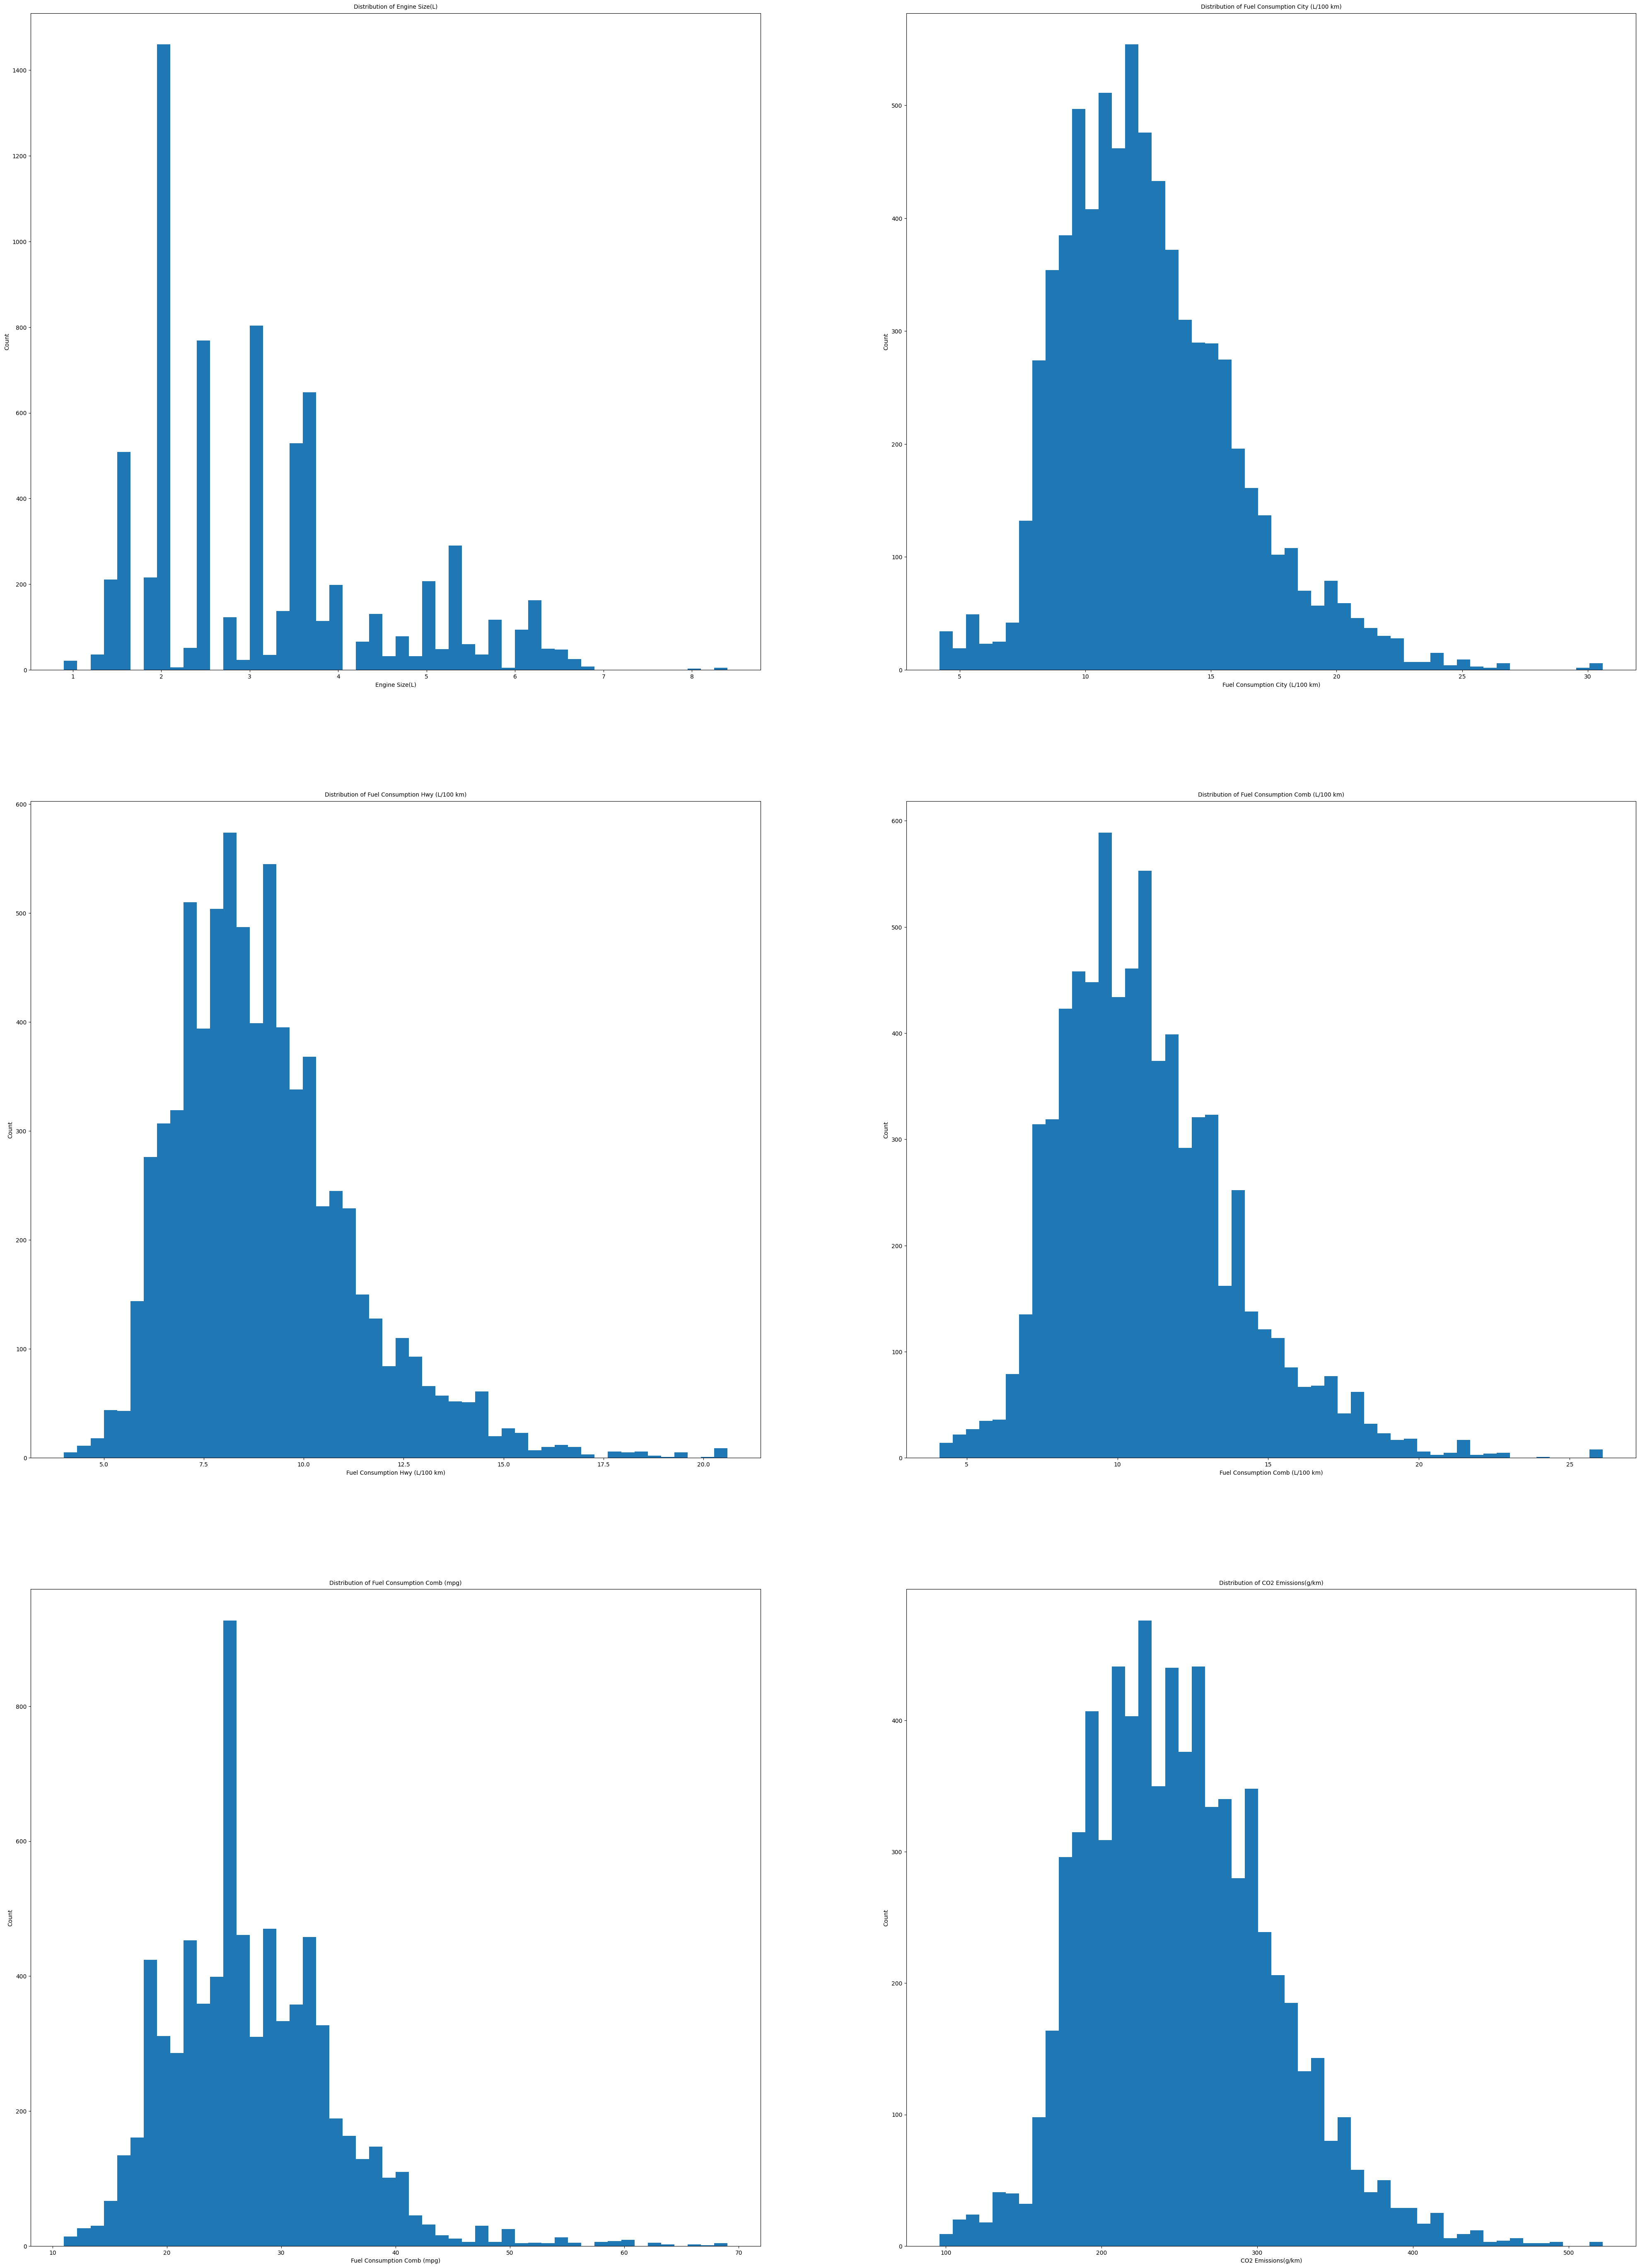

In [ ]:
# Lặp qua các thuộc tính, vẽ biểu đồ cột của 6 đặc trưng định lượng
fig, axs = plt.subplots(3, 2, figsize=(50,70))
for ax, col in zip(axs.flat, numerical):
  ax.hist(emissions[col], bins=50)
  ax.set(xlabel=col, ylabel="Count")
  ax.set_title(f"Distribution of {col}",  fontsize=10, pad=8)

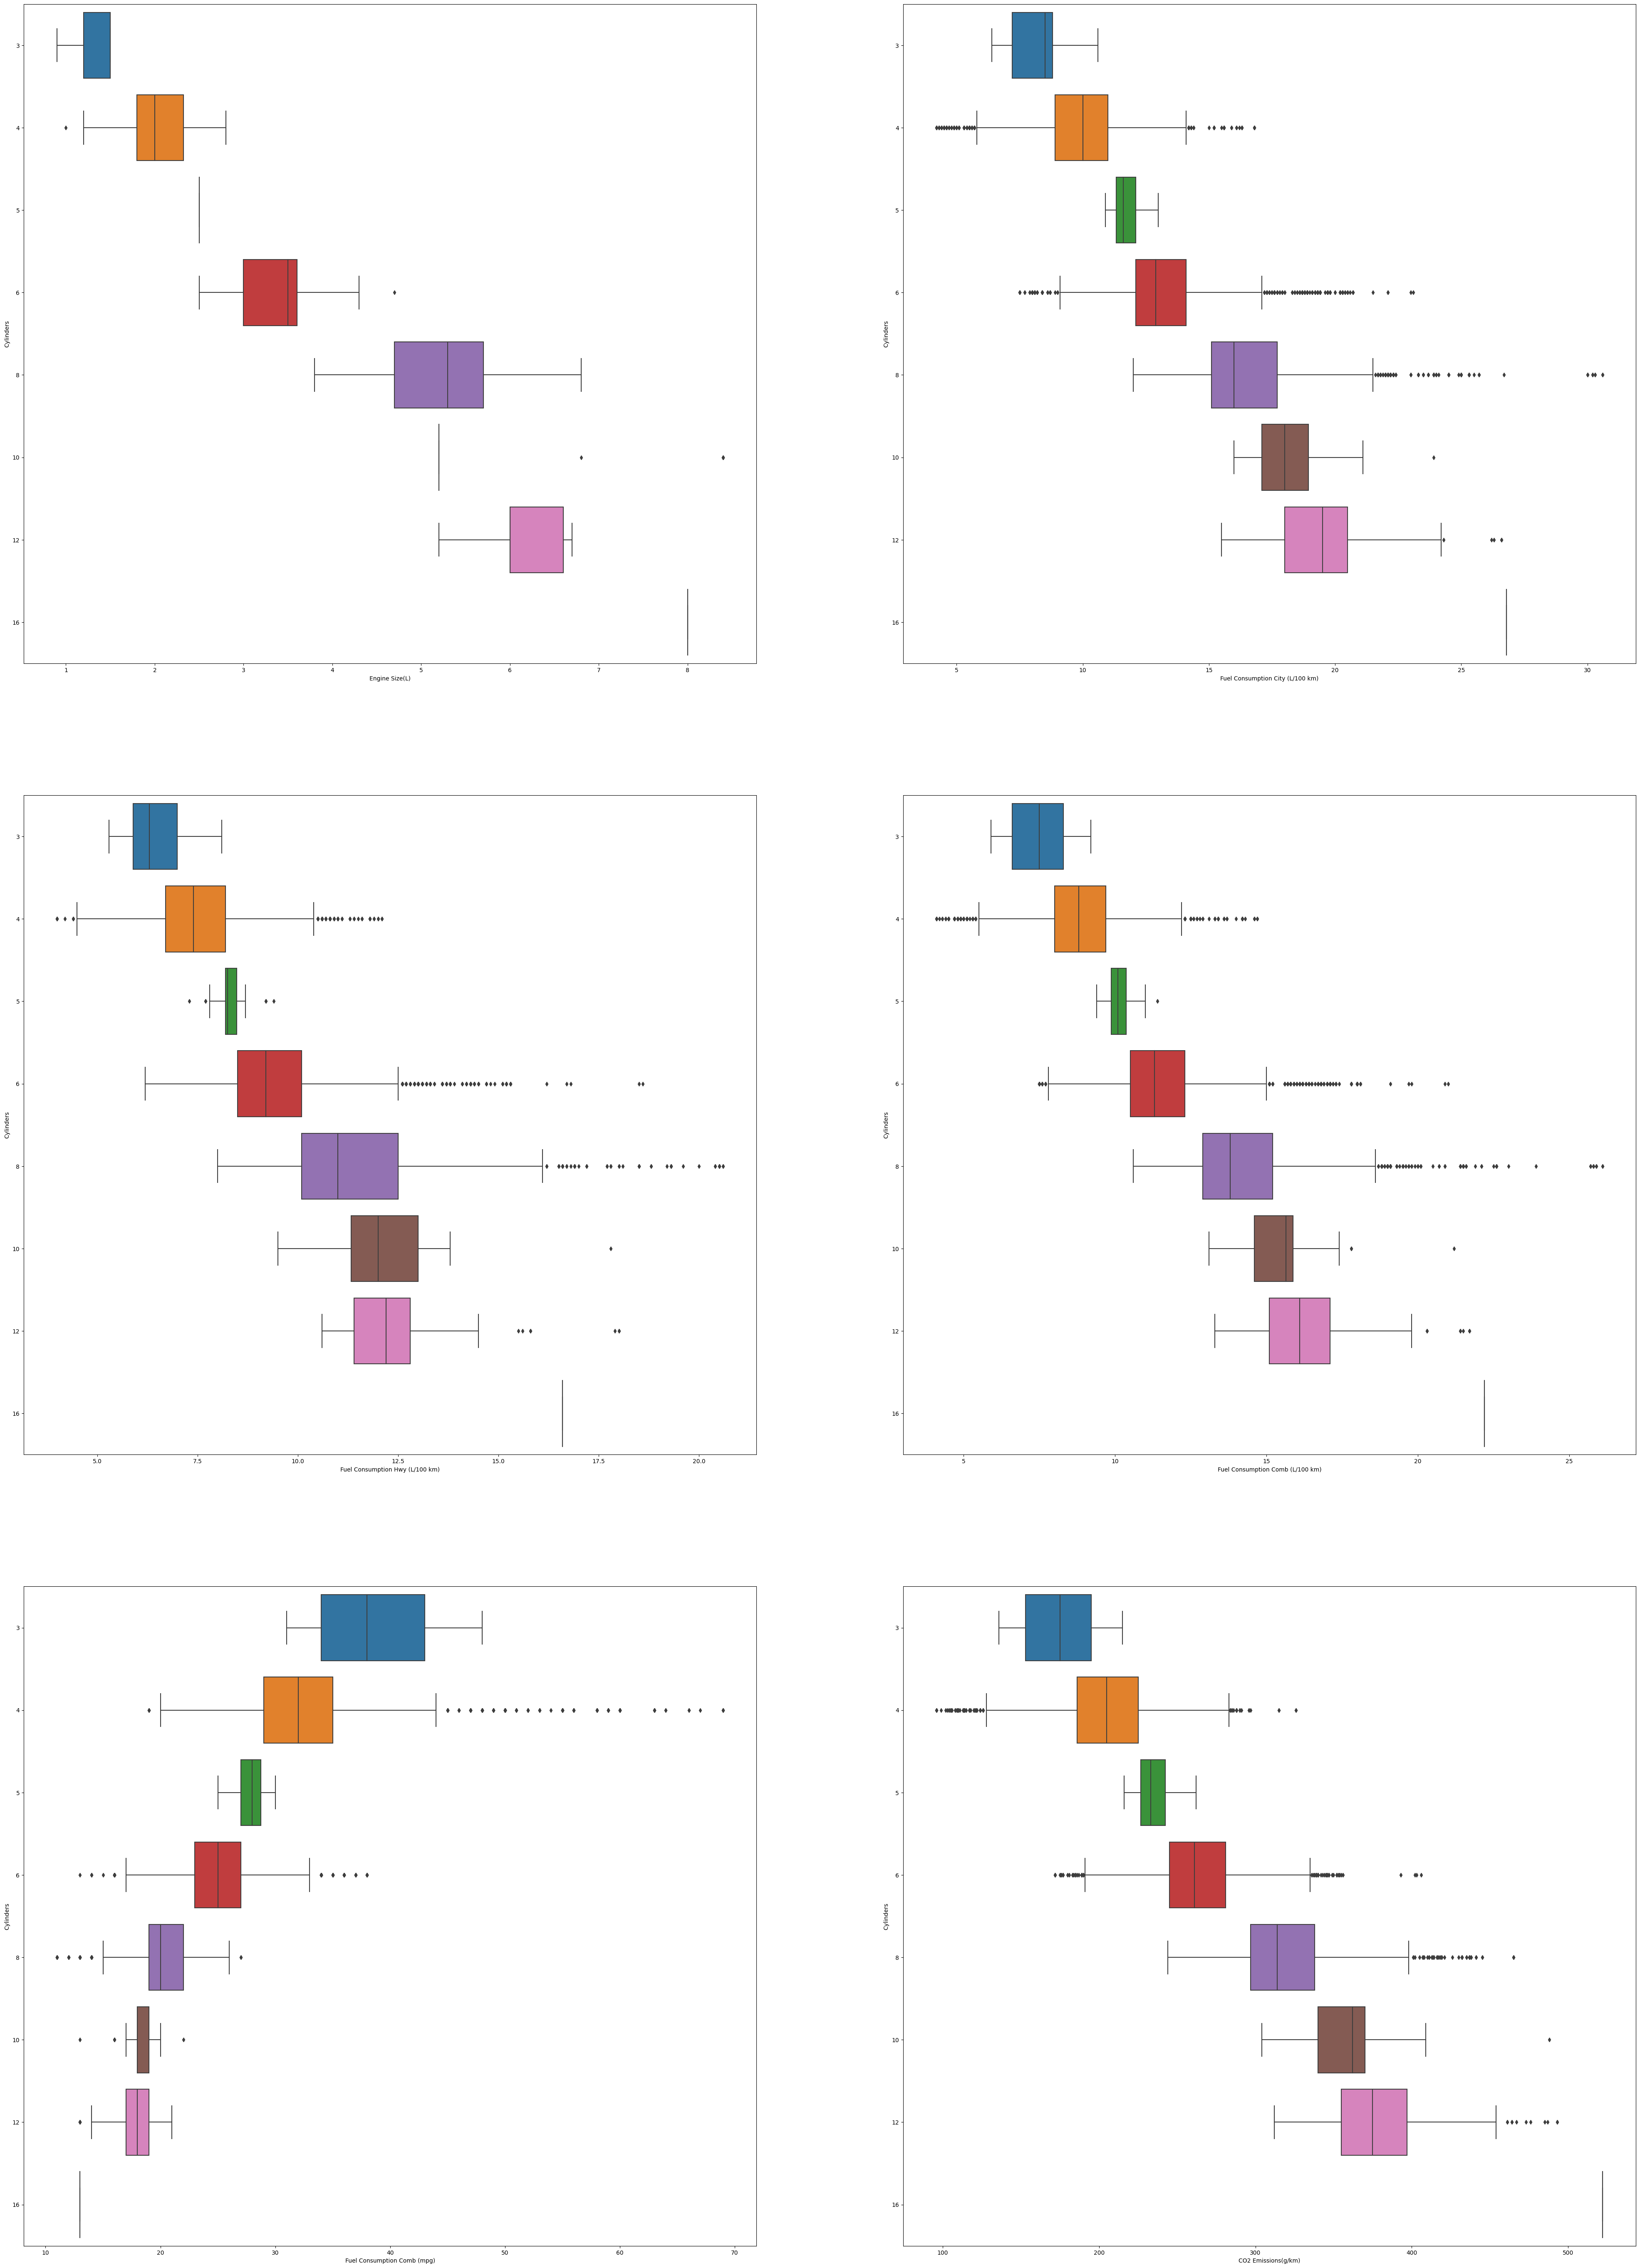

In [ ]:
# Lặp qua các thuộc tính, vẽ biểu đồ hộp của 6 đặc trưng định lượng, thể hiện quan hệ giữa chúng với biến phân lớp
fig, axs = plt.subplots(3, 2, figsize=(50,70))
for ax, col in zip(axs.flat, numerical):
  sns.boxplot(ax=ax, x=col, y="Cylinders", data=emissions, orient='h')

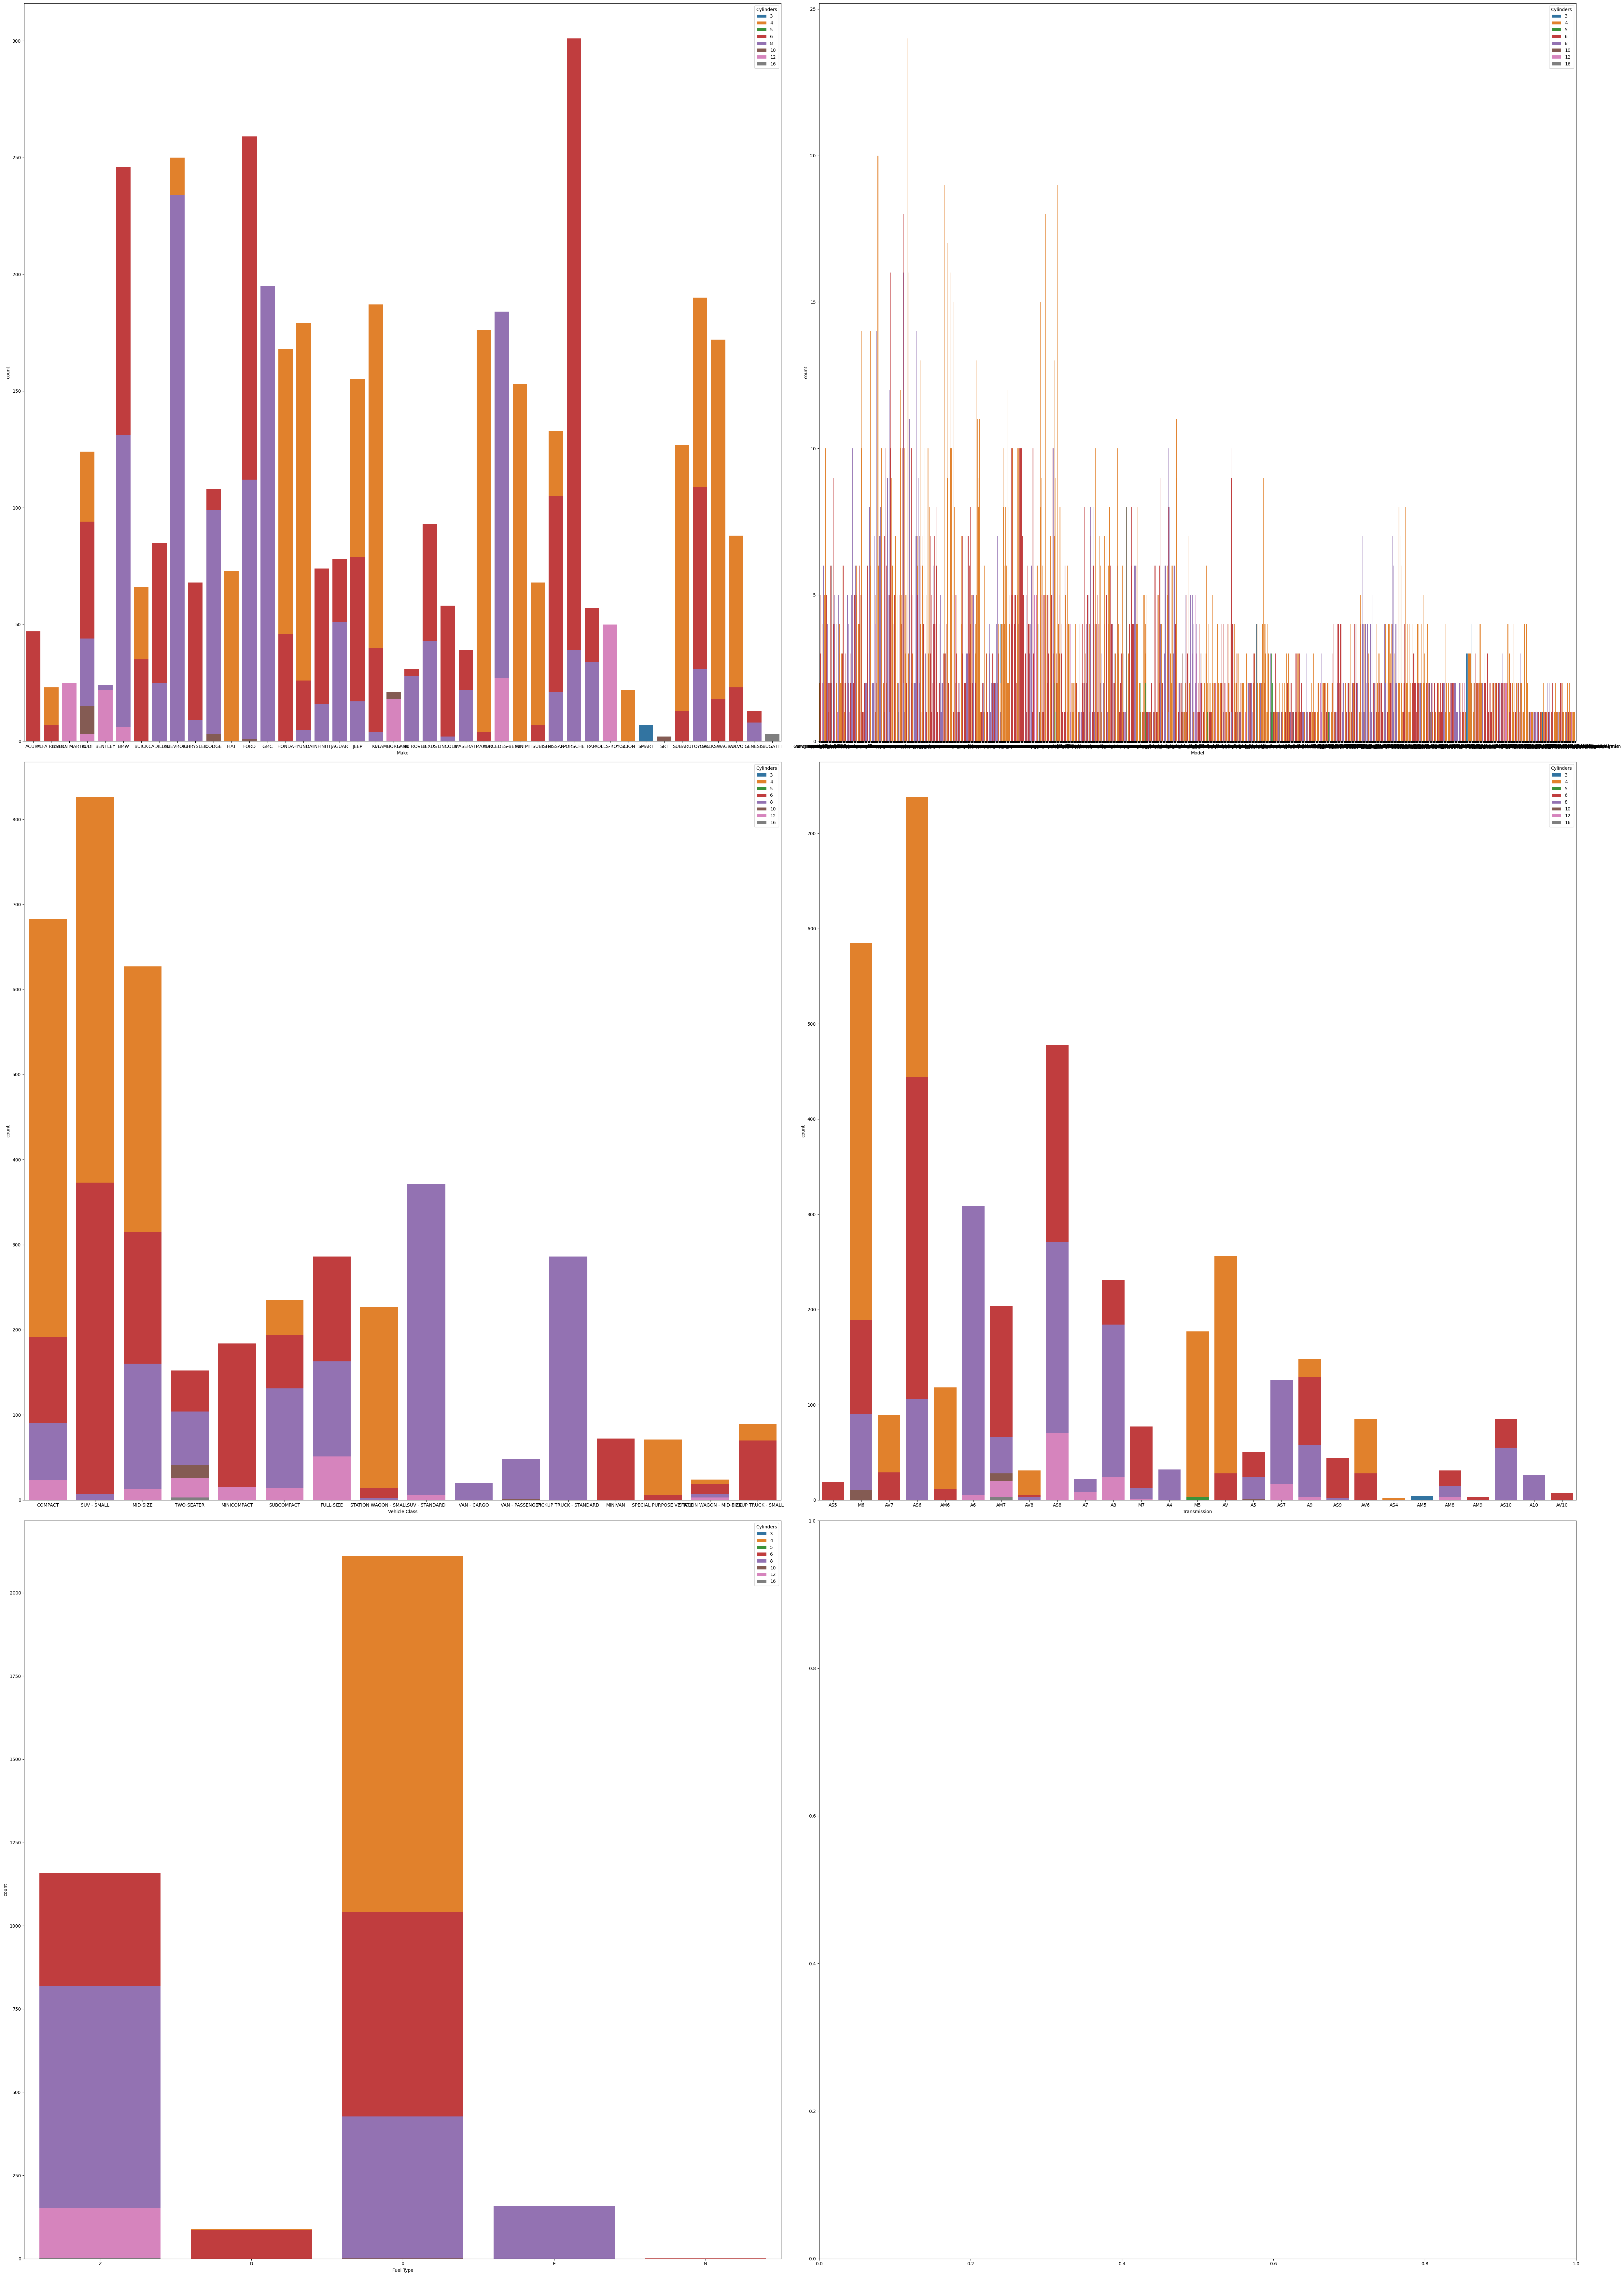

In [ ]:
# Biểu đồ cột của 5 đặc trưng định tính, có dữ liệu phân lớp.
fig, axs = plt.subplots(3, 2, figsize=(50,70))
for ax, col in zip(axs.flat, categorical):
    sns.countplot(ax=ax, x=col, hue='Cylinders', data=emissions, dodge=False)

fig.tight_layout()

- Đối với đặc trưng định lượng (numerical features) của dataset, ta thấy phân bố dữ liệu khá đa dạng và không đồng đều, có một số cột có phân bố gần như chuẩn (normal distribution) như là Engine Size(L) và CO2 Emissions(g/km), trong khi đó các cột khác có phân bố không đồng đều và nhiều giá trị outlier.

- Đối với đặc trưng phân loại (categorical features) của dataset, ta thấy phân bố các nhóm dữ liệu không đồng đều, với một số đặc trưng có số lượng dữ liệu rất ít, có thể gây ảnh hưởng đến khả năng phân loại của thuật toán.

  => *Vì vậy, để tăng cường khả năng phân loại của thuật toán, ta có thể thực hiện một số xử lý dữ liệu như xóa bỏ outlier, xử lý dữ liệu bị thiếu (nếu có), làm sạch dữ liệu và tái cân bằng các lớp dữ liệu nếu số lượng dữ liệu trong các lớp khác nhau quá chênh lệch.*

#2. Tiền xử lý dữ liệu
##2.1. Sơ chế dữ liệu (Data Wrangling)
- Kiểm tra và loại bỏ các giá trị bị thiếu trong tập dataset.
- Kiểm tra và loại bỏ các dữ liệu bị outlier.
- Kiểm tra và xử lý các hàng trùng lặp trong tập dataset.
- Chuyển đổi quy mô dữ liệu (Scaling Transformation).
- Chuyển đổi phân phối dữ liệu (Distribution Transformation).
- Mã hóa nhãn biến định tính (Label Encoding) cho các đặc trưng phân loại không phải là số.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Kiểm tra có ô nào bị thiếu dữ liệu trong dataset
print(emissions.isnull().sum())

# Đếm số hàng trùng lặp
print(emissions.duplicated().sum())

# Xóa các hàng trùng lặp (có 1103 hàng)
emissions.drop_duplicates(inplace=True)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
1103


##2.2. Trích chọn đặc trưng
Ta sẽ sử dụng phương pháp mang tên Mutual Information, triển khai thông qua hàm mutual_info_classif của sklearn. Nguyên nhân lựa chọn là do phương pháp này áp dụng tốt đối với cả biến đầu vào định lượng và định tính. Số đặc trưng được trích trên tổng số đặc trưng của bộ dữ liệu là 6 (lý do chọn được thể hiện ngay sau trích chọn đặc trưng)

In [ ]:
# Tạo các transformer cho các cột dữ liệu số và phân loại
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical),
        ('cat', cat_transformer, categorical)
    ])

# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(mutual_info_classif, k=6))
])

# Áp dụng pipeline cho tập dữ liệu
X = emissions.drop(['Cylinders'], axis=1)
y = emissions['Cylinders']

X_selected = pipe.fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/loc

>Threshold=0.00, Features=54
>Threshold=0.05, Features=22
>Threshold=0.10, Features=14
>Threshold=0.15, Features=8
>Threshold=0.20, Features=8
>Threshold=0.25, Features=6
>Threshold=0.30, Features=6
>Threshold=0.35, Features=6
>Threshold=0.40, Features=6
>Threshold=0.45, Features=6
>Threshold=0.50, Features=6


<ipython-input-7-d86396d5f74c>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_num = df[num_columns].values.astype(np.float)


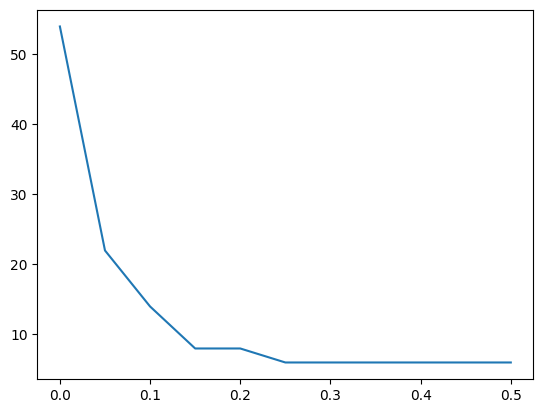

In [ ]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Chuyển đổi các biến định tính
cat_columns = ['Vehicle Class', 'Transmission', 'Fuel Type']
encoder = OneHotEncoder()
X_cat = encoder.fit_transform(df[cat_columns])


# Chuyển đổi các biến định lượng
num_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']
X_num = df[num_columns].values.astype(np.float)

# Kết hợp các giá trị định lượng và định tính
X = np.hstack([X_num, X_cat.toarray()])

from sklearn.feature_selection import VarianceThreshold

thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

#3. Xây dựng mô hình và đánh giá kết quả
Sau khi đã xử lý dữ liệu, bước tiếp theo ta sẽ tiến hành xây dựng các mô hình máy học để dự đoán số xy-lanh của một chiếc xe dựa trên các mẫu dữ liệu.

Các thuật toán sẽ sử dụng để xây dựng mô hình:

1. SVM (Support Vector Machines)
2. kNN (Thuật Toán K-Nearest Neighbors)
3. Naïve Bayes (GaussianNB)
4. RandomForest
5. Decision Tree
6. Neural Network (Fully connected neural network)

Ta sẽ xây dựng một hàm tổng quát nhận vào thuật toán phân lớp để sử dụng cho các thuật toán khác nhau. Các bước của hàm sẽ như sau:
 - Bước 1: Lấy dữ liệu từ **X_selected** và **y** đã qua xử lý ở trên.
 - Bước 2: Phân chia tập dữ liệu thành các tập test và train với 25% cho test và train là 75%, bảo tồn tỷ lệ phân lớp (stratify=y) với hàm train_test_split.
 - Bước 3: Khởi tạo mô hình, nhận thuật toán phân lớp thông qua tham số clf (classifier) của hàm.
 - Bước 4: Đánh giá mô hình bằng Cross Validation trên tập train:
  - Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.
  - Cross Validation có 5 fold, 3 lần lặp lại, bảo tồn tỷ lệ phân lớp (stratified). Triển khai thông qua lớp RepeatedStratifiedKFold của sklearn. *(Có hiệu suất tốt cũng như được khuyến nghị sử dụng hơn KFold)*.
  - Thực hiện kiểm chứng mô hình trên tập train, kết quả đánh giá được lưu vào tệp **clf_cv_scores.csv** để sử dụng so sánh giữa các mô hình.
 - Bước 5: Huấn luyện mô hình, dùng model để dự đoán trên tập test.
 - Bước 6: Đánh giá kết quả dự đoán của mô hình trên tập test:
  - Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.
  - Lưu kết quả đánh giá vào tệp **clf_model_scores.csv**.
  - Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả cross validation trên tập train.
  - Vẽ Confusion Matrix cho kết quả dự đoán của mô hình trên tập test.

In [ ]:
from matplotlib import axis
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y, random_state=0)

def build_and_eval_model(clf):
  
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro')],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)


##3.1. SVM
Ta sẽ chọn tham số C bằng cách kiểm tra tương quan giữa tham số C và F1. Lý do tại sao là vì F1 là một độ đo tổng hợp của độ chính xác (precision) và độ phủ (recall), nó cung cấp cho chúng ta một cái nhìn tổng quan về hiệu suất của mô hình.

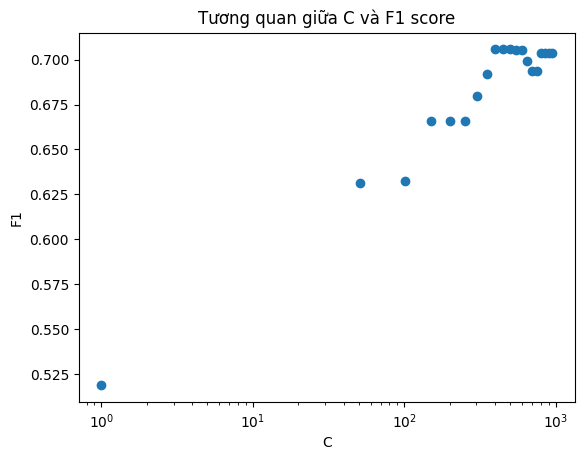

Giá trị C tốt nhất: 401


In [ ]:
#Lựa chọn tham số C bằng cách kiểm tra tương quan giữa C và F1
from sklearn import svm

# Ta sẽ kiểm tra trong khoảng từ 1 đến 1000 với bước nhảy mỗi lần là 50
C_range = np.arange(start=1, stop=1000, step=50)

# Lưu giá trị C và F1 score tương ứng
C_list = []
f1_list = []

for C in C_range:
    # Huấn luyện mô hình SVM
    clf = svm.SVC(C=C)
    clf.fit(X_train, y_train)
    # Tính toán F1 score trên tập kiểm tra
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    # Lưu giá trị C và F1 score
    C_list.append(C)
    f1_list.append(f1)

# Vẽ biểu đồ tương quan giữa C và F1 score
plt.plot(C_list, f1_list, 'o', linestyle='')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1')
plt.title('Tương quan giữa C và F1 score')
plt.show()

# Chọn giá trị C tốt nhất
best_C = C_list[np.argmax(f1_list)]
print('Giá trị C tốt nhất:', best_C)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.954858              0.717489           0.622336       0.649646
std         0.004444              0.058834           0.034867       0.042186
min         0.949045              0.607747           0.573294       0.585164
25%         0.952229              0.671327           0.598193       0.623646
50%         0.953340              0.730191           0.619595       0.655007
75%         0.957559              0.760051           0.638171       0.668470
max         0.963907              0.808906           0.690368       0.728224


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


B. Final Validation with test set
 accuracy  precision   recall       f1
 0.963717   0.758905 0.680802 0.705751


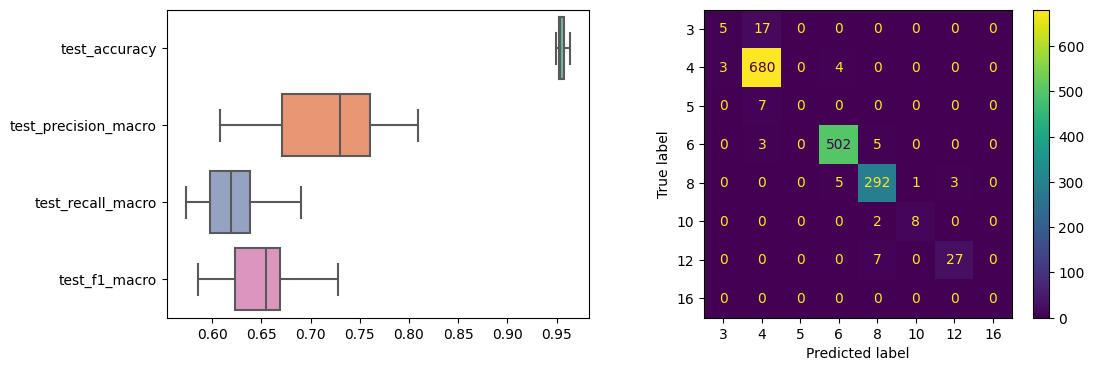

In [ ]:
clf = svm.SVC(C=401)
build_and_eval_model(clf)

##3.2. kNN
Ta sẽ sử dụng **GridSearchCV** để tìm giá trị k tốt nhất

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best k: ", grid.best_params_['n_neighbors'])
print("Best accuracy: ", grid.best_score_)

Best k:  3
Best accuracy:  0.95945636494771


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.966816              0.815319           0.762439       0.777666
std         0.004800              0.075995           0.069910       0.066640
min         0.955461              0.666198           0.574563       0.608297
25%         0.964437              0.774196           0.736118       0.748241
50%         0.967091              0.811725           0.766526       0.780309
75%         0.970292              0.876648           0.802995       0.825176
max         0.973461              0.928375           0.862217       0.888271
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.975175   0.823484 0.817167 0.818838


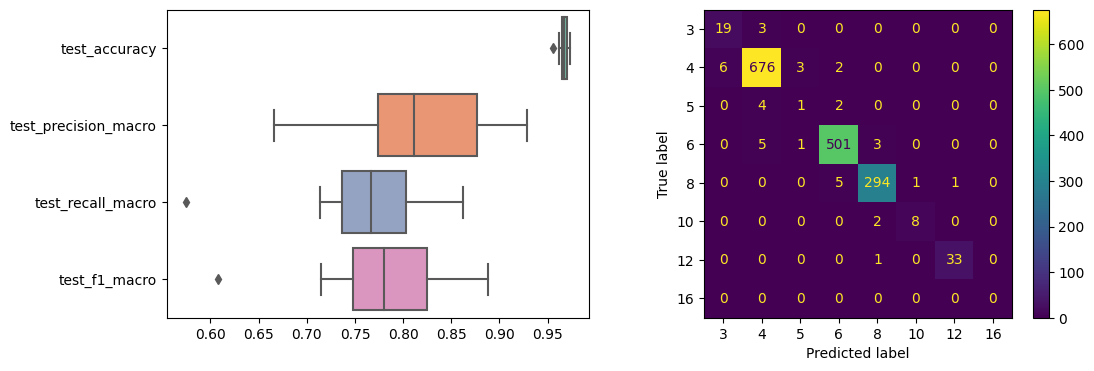

In [ ]:
clf = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
build_and_eval_model(clf)

##3.3. Naïve Bayes (GaussianNB)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.813557              0.558580           0.717849       0.569173
std         0.014034              0.059218           0.047124       0.037689
min         0.787686              0.485162           0.634336       0.514360
25%         0.804671              0.503964           0.685537       0.541300
50%         0.814422              0.549431           0.727190       0.569563
75%         0.819629              0.594567           0.754259       0.601745
max         0.850318              0.673946           0.774036       0.621270
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.838956   0.656097 0.717294 0.596697


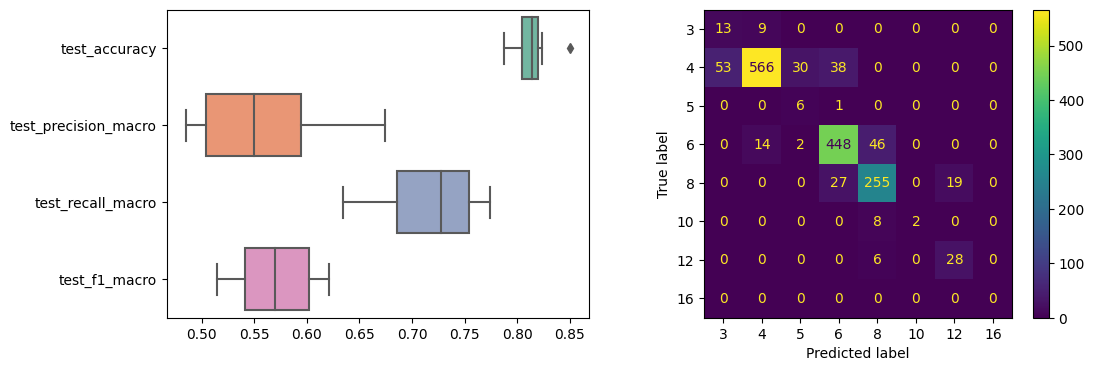

In [ ]:
from sklearn.naive_bayes import GaussianNB

def build_and_eval_model_nb(clf):

    X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_selected.toarray(), y, test_size=0.25, stratify=y, random_state=0)
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train_nb, y_train_nb, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    clf.fit(X_train_nb, y_train_nb)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test_nb)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_nb, y_pred)],
                                 'precision': [precision_score(y_test_nb, y_pred, average='macro')],
                                 'recall': [recall_score(y_test_nb, y_pred, average='macro')],
                                 'f1': [f1_score(y_test_nb, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test_nb, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

clf = GaussianNB()
build_and_eval_model_nb(clf)

##3.4. RandomForest
Đầu tiên ta sẽ thử chọn ra các tham số tốt nhất cho thuật toán bằng **GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf, param_grid=param_grid)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, clf_predict)
rf_precision_score = precision_score(y_test, clf_predict, average='macro')
rf_recall_score = recall_score(y_test, clf_predict, average='macro')
rf_f1_score = f1_score(y_test, clf_predict, average='macro')
rf_best_param = clf.best_params_
rf_bestscore = clf.best_score_
print(rf_best_param)
print(rf_bestscore)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}
0.9554234689397573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.955424              0.624238           0.528073       0.557643
std         0.005098              0.051992           0.044624       0.045968
min         0.945860              0.554164           0.459907       0.487522
25%         0.952810              0.567659           0.487710       0.511538
50%         0.955414              0.644393           0.536260       0.571047
75%         0.957006              0.666981           0.568986       0.599444
max         0.964968              0.688832           0.581452       0.614337


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


B. Final Validation with test set
 accuracy  precision   recall       f1
  0.94844   0.625682 0.526574 0.553454


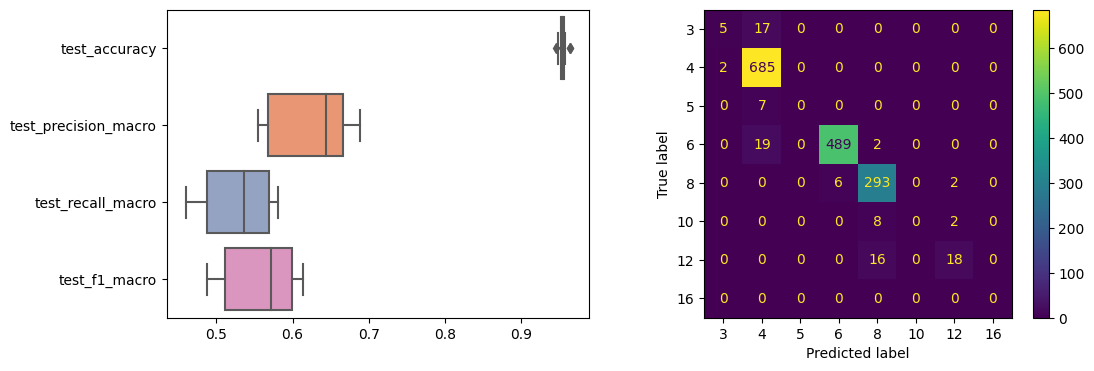

In [ ]:
clf = RandomForestClassifier(max_depth= 6, max_features=None, max_leaf_nodes=9, n_estimators=50)
build_and_eval_model(clf)

##3.5. Decision Tree
Đầu tiên ta sẽ thử chọn ra các tham số tốt nhất cho thuật toán bằng **GridSearchCV**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
0.9836556321808025


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.983514              0.908173           0.902166       0.897334
std         0.004128              0.029836           0.052291       0.038098
min         0.973461              0.855905           0.811539       0.819314
25%         0.980902              0.893001           0.876446       0.876304
50%         0.984076              0.907375           0.914143       0.904605
75%         0.987261              0.927404           0.932294       0.923277
max         0.988323              0.966379           0.982888       0.946815
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.985996   0.930303 0.876821 0.892675


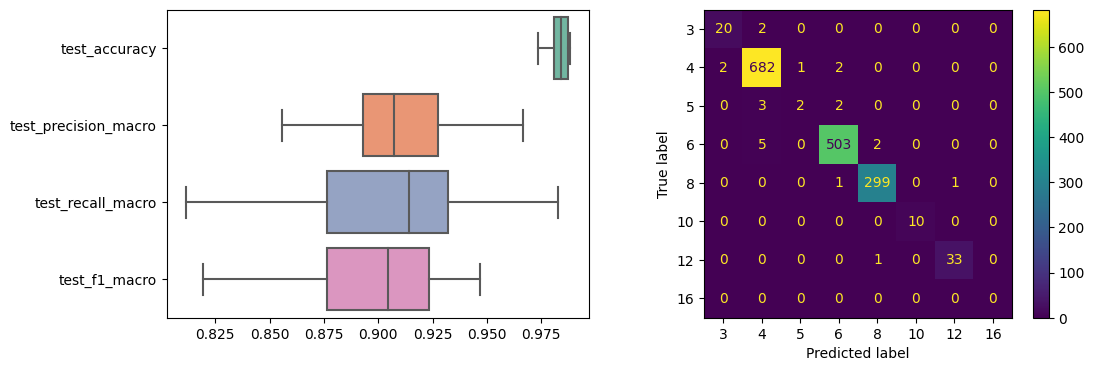

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
build_and_eval_model(clf)

##3.6. Neural Network (Fully connected neural network)
Ta cũng sẽ sử dụng GridSearchCV để tìm hyperparameters tốt nhất cho thuật toán


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras

input_dim = X_selected.shape[1]
num_classes=y.nunique()

In [ ]:
normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, stratify=y_categorical, random_state=0)

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

#Create a python function that returns a compiled DNN model
def create_dnn_model():
  model = Sequential()
  model.add(Dense(250,input_dim=input_dim, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
  
#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)

grid_model.fit(X_train, y_train)
best_model = grid_model.best_estimator_
print(best_model)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


37/37 [==============================] - 2s 9ms/step - loss: 1.2748 - accuracy: 0.7361
Epoch 2/60
37/37 [==============================] - 0s 9ms/step - loss: 0.5620 - accuracy: 0.8654
Epoch 3/60
37/37 [==============================] - 0s 9ms/step - loss: 0.4009 - accuracy: 0.9072
Epoch 4/60
37/37 [==============================] - 0s 9ms/step - loss: 0.3372 - accuracy: 0.9166
Epoch 5/60
37/37 [==============================] - 0s 7ms/step - loss: 0.3022 - accuracy: 0.9208
Epoch 6/60
37/37 [==============================] - 0s 5ms/step - loss: 0.2810 - accuracy: 0.9232
Epoch 7/60
37/37 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.9219
Epoch 8/60
37/37 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.9261
Epoch 9/60
37/37 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.9266
Epoch 10/60
37/37 [==============================] - 0s 6ms/step - loss: 0.2296 - accuracy: 0.9263
Epoch 11/60
37/37 [===========

Khác với cách sử dụng cross validation cho các thuật toán trên, Neural network có một số đặc thù cụ thể, vì thế ta cần sử dụng cross validation khác đi một chút, cụ thể ta sẽ tách dữ liệu có sẵn thành một tập dữ liệu train được sử dụng để tìm một tập hợp các trọng số và giá trị thiên vị tốt và một tập test được sử dụng để đánh giá chất lượng của neural network

Code được tham khảo từ https://visualstudiomagazine.com/articles/2013/10/01/understanding-and-using-kfold.aspx

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:

# Define the neural network model
model = Sequential()
model.add(Dense(250,input_dim=X_selected.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Train and evaluate the model using cross-validation
scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in cv.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_integer_train = y_train.astype('category').cat.codes
    y_integer_test = y_test.astype('category').cat.codes

    y_train_cat = keras.utils.to_categorical(y_integer_train, num_classes=8)
    y_test_cat = keras.utils.to_categorical(y_integer_test, num_classes=8)

    model.fit(X_train, y_train_cat, epochs=60, batch_size=64, verbose=1)
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    score = model.evaluate(X_test, y_test_cat, verbose=0)
    scores.append(score[1])

    y_check = np.array(y_integer_test)
    report = classification_report(y_check, y_pred_classes, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

results = pd.DataFrame({
    'test_accuracy': scores,
    'test_precision_macro': precision_scores,
    'test_recall_macro': recall_scores,
    'test_f1_macro':  f1_scores
})

print(results)

results.to_csv('{}_cv_scores.csv'.format(model.__class__.__name__), index=False)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


79/79 [==============================] - 2s 9ms/step - loss: 1.7090 - accuracy: 0.5182
Epoch 2/60
79/79 [==============================] - 1s 9ms/step - loss: 1.0857 - accuracy: 0.7300
Epoch 3/60
79/79 [==============================] - 1s 9ms/step - loss: 0.8673 - accuracy: 0.8042
Epoch 4/60
79/79 [==============================] - 1s 10ms/step - loss: 0.7530 - accuracy: 0.8340
Epoch 5/60
79/79 [==============================] - 1s 8ms/step - loss: 0.6732 - accuracy: 0.8480
Epoch 6/60
79/79 [==============================] - 1s 11ms/step - loss: 0.6116 - accuracy: 0.8595
Epoch 7/60
79/79 [==============================] - 1s 7ms/step - loss: 0.5633 - accuracy: 0.8695
Epoch 8/60
79/79 [==============================] - 1s 7ms/step - loss: 0.5238 - accuracy: 0.8800
Epoch 9/60
79/79 [==============================] - 1s 7ms/step - loss: 0.4899 - accuracy: 0.8878
Epoch 10/60
79/79 [==============================] - 1s 7ms/step - loss: 0.4604 - accuracy: 0.8943
Epoch 11/60
79/79 [=========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9371
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9359
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9383
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1894 - accuracy: 0.9379
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.9369
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.9383
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1867 - accuracy: 0.9375
Epoch 8/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9381
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1852 - accuracy: 0.9367
Epoch 10/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.9371
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9413
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9443
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9419
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9427
Epoch 5/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9421
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1605 - accuracy: 0.9435
Epoch 7/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9435
Epoch 8/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9425
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9429
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9451
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9481
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1492 - accuracy: 0.9473
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.9483
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.9469
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.9473
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9477
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9475
Epoch 8/60
79/79 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9477
Epoch 9/60
79/79 [==============================] - 0s 5ms/step - loss: 0.1482 - accuracy: 0.9475
Epoch 10/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.9483
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1455 - accuracy: 0.9461
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9469
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9469
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9477
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9469
Epoch 6/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9471
Epoch 7/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9485
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9461
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9477
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.9467
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

79/79 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9495
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9502
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9491
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9493
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9495
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1415 - accuracy: 0.9504
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1419 - accuracy: 0.9500
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1415 - accuracy: 0.9495
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1417 - accuracy: 0.9504
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1412 - accuracy: 0.9489
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1399 - accuracy: 0.9495
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9504
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9502
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.9499
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9502
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9493
Epoch 7/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9489
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9489
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9506
Epoch 10/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9500
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9528
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1375 - accuracy: 0.9515
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.9528
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9517
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9530
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1366 - accuracy: 0.9526
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1369 - accuracy: 0.9524
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1365 - accuracy: 0.9530
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9532
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.9517
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9548
Epoch 2/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9552
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9546
Epoch 4/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9550
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9558
Epoch 6/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9554
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9542
Epoch 8/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1312 - accuracy: 0.9546
Epoch 9/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1317 - accuracy: 0.9556
Epoch 10/60
79/79 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9550
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9560
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9560
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.9552
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9542
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9550
Epoch 6/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1286 - accuracy: 0.9548
Epoch 7/60
79/79 [==============================] - 1s 7ms/step - loss: 0.1290 - accuracy: 0.9546
Epoch 8/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1290 - accuracy: 0.9558
Epoch 9/60
79/79 [==============================] - 1s 6ms/step - loss: 0.1290 - accuracy: 0.9562
Epoch 10/60
79/79 [==============================] - 1s 6ms/step - loss: 0.1288 - accuracy: 0.9554
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

79/79 [==============================] - 0s 6ms/step - loss: 0.1292 - accuracy: 0.9540
Epoch 2/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1295 - accuracy: 0.9540
Epoch 3/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1286 - accuracy: 0.9542
Epoch 4/60
79/79 [==============================] - 1s 6ms/step - loss: 0.1292 - accuracy: 0.9532
Epoch 5/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1279 - accuracy: 0.9556
Epoch 6/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1286 - accuracy: 0.9540
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.9540
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9544
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9538
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1285 - accuracy: 0.9546
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.9524
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9534
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9520
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9522
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9536
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9542
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9524
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9540
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9532
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9532
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9546
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9544
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9546
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9554
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9546
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9540
Epoch 7/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1248 - accuracy: 0.9552
Epoch 8/60
79/79 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9540
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9548
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9554
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 4ms/step - loss: 0.1293 - accuracy: 0.9519
Epoch 2/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9515
Epoch 3/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9522
Epoch 4/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.9519
Epoch 5/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9515
Epoch 6/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9515
Epoch 7/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1285 - accuracy: 0.9534
Epoch 8/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1285 - accuracy: 0.9519
Epoch 9/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1288 - accuracy: 0.9524
Epoch 10/60
79/79 [==============================] - 1s 6ms/step - loss: 0.1283 - accuracy: 0.9532
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


79/79 [==============================] - 0s 6ms/step - loss: 0.1216 - accuracy: 0.9562
Epoch 2/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1212 - accuracy: 0.9560
Epoch 3/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1211 - accuracy: 0.9560
Epoch 4/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1210 - accuracy: 0.9562
Epoch 5/60
79/79 [==============================] - 1s 6ms/step - loss: 0.1209 - accuracy: 0.9562
Epoch 6/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1205 - accuracy: 0.9564
Epoch 7/60
79/79 [==============================] - 0s 6ms/step - loss: 0.1212 - accuracy: 0.9554
Epoch 8/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9560
Epoch 9/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1210 - accuracy: 0.9558
Epoch 10/60
79/79 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9562
Epoch 11/60
79/79 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/60
74/74 [==============================] - 1s 6ms/step - loss: 1.8240 - accuracy: 0.5640
Epoch 2/60
74/74 [==============================] - 0s 6ms/step - loss: 1.3856 - accuracy: 0.6444
Epoch 3/60
74/74 [==============================] - 0s 6ms/step - loss: 1.0835 - accuracy: 0.6476
Epoch 4/60
74/74 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.6557
Epoch 5/60
74/74 [==============================] - 0s 5ms/step - loss: 0.8153 - accuracy: 0.6708
Epoch 6/60
74/74 [==============================] - 0s 4ms/step - loss: 0.7481 - accuracy: 0.7682
Epoch 7/60
74/74 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.7926
Epoch 8/60
74/74 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.8234
Epoch 9/60
74/74 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.8444
Epoch 10/60
74/74 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.8514
Epoch 11/60
74/74 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


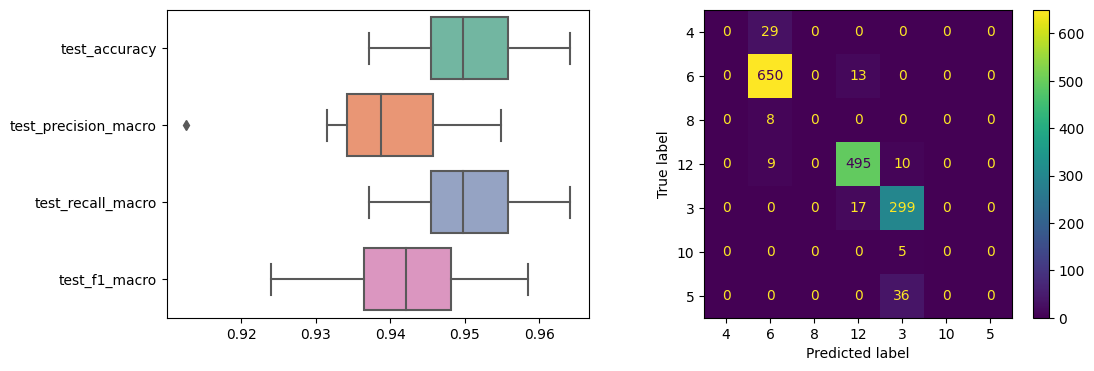

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

model = Sequential()
model.add(Dense(250,input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, random_state=0)

model.fit(X_train, y_train, epochs=60, batch_size=64, verbose=1)

score = model.evaluate(X_test, y_test)
print(score)

y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to integers
y_test_int = np.argmax(y_test, axis=1)

#Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_int, y_pred_int)],
                                 'precision': [precision_score(y_test_int, y_pred_int, average='macro')],
                                 'recall': [recall_score(y_test_int, y_pred_int, average='macro')],
                                 'f1': [f1_score(y_test_int, y_pred_int, average='macro')]})


#  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=results, orient="h", palette="Set2", ax=axs[0])

# Calculate confusion matrix
display_labels = [4,6,8,12,3,10,5]
cm = confusion_matrix(y_test_int, y_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(ax=axs[1])
plt.show()

# Lưu kết quả đánh giá
final_scores.to_csv('{}_final_scores.csv'.format(model.__class__.__name__), index=False)


#4. Tổng kết
##4.1. So sánh kết quả đánh giá giữa các mô hình:
  - Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả cross validation trên tập train của các mô hình.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

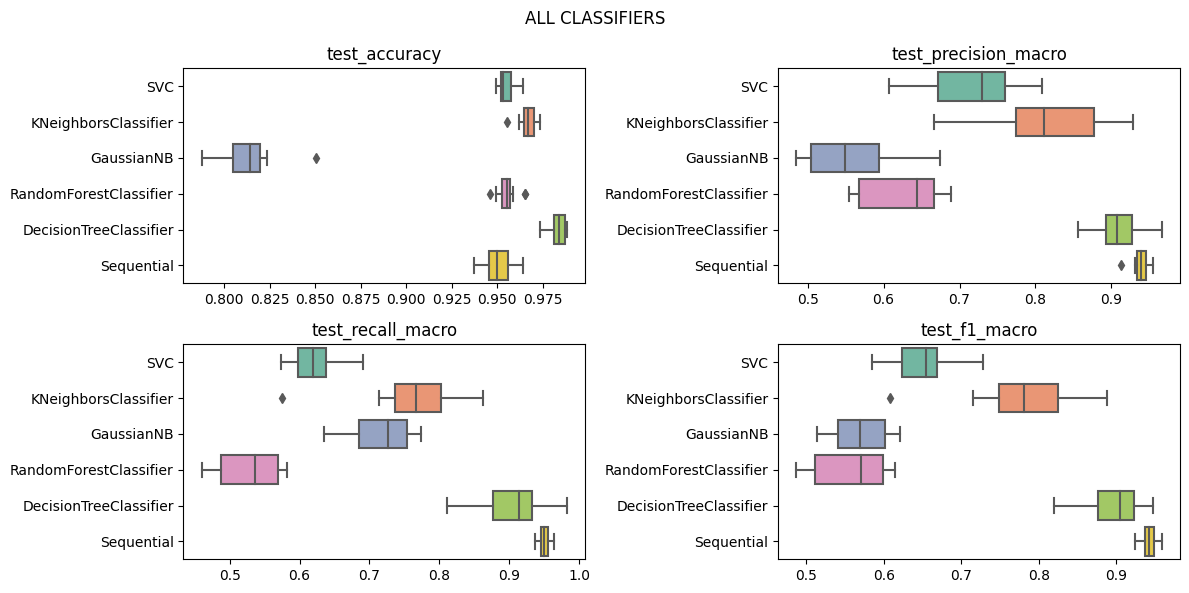

In [ ]:
clf_names = ['SVC', 'KNeighborsClassifier', 'GaussianNB',
            'RandomForestClassifier', 'DecisionTreeClassifier', 'Sequential']
score_names = ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']
def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}
    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

# Nhóm 1: Vẽ biểu đồ cho tất cả clf
build_plots('ALL CLASSIFIERS')

##4.2. Kết luận

In [ ]:
#code